#### Hello !!
Dit notebook en een vliegende start in data-analyse en machinelearning.

1)Feature Selection

2)Model selection

3)Input validation

....

Voordat je begint moet je voor jezelf beantwoorden:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?



#### Antwoorden:

**Wat is diabetes?**

Diabetes (suikerziekte) is een chronische stofwisselingsziekte. Bij diabetes zit er te veel suiker in het bloed. Het lichaam kan de bloedsuiker niet op peil houden.

**Hoe krijg je het?**

Er zijn twee bekende diabetes types: 1 & 2.

Type 1:
1. virussen
2. voeding
3. erfelijkheid (in geringe mate)

Type 2:
1. erfelijke aanleg
2. (ernstig) overgewicht
3. te weinig bewegen
4. roken
5. voeding

**Zijn er verschillende soorten?**

Ja er zijn verschillende soorten. Bekendste zijn type 1 & 2. Daarnaast zijn er nog een aantal, zoals: MODY, LADA en zwangerschapsdiabetes

**Wat zijn de gevolgen?**

Top 5 gevolgen die kunnen voorkomen zijn:

1. wondjes aan de voeten
2. nierschade
3. zenuwbeschadiging
4. hart-vaat ziektes
5. slaapstoornis

**Hoe wordt het gediagnoseerd?**

Door bloed te prikken kan ene arts weten of je de ziekte hebt. Als je glucosewaarde hoger dan 7 mmol/l is (nucther), dan heb je diabetes.
Je kunt diabetes herkennen aan:

1. veel dorst
2. vaak plassen
3. droge mond
4. moe voelen
5. oogontsteking of wazig zien
6. gewicht verliezen
7. (urineweg)infecties

**Hoe wordt het behandeld?**

Type 1 is er geen genezing mogelijk. Voor type 2 kun je zelf afvallen en medicijnen zoals insuline gebruiken.











####  Test voor benodigde modules. Heb je een foutmelding installeer dan met Pip de ontbrekende modules.

In [57]:
# Import nodige modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan variable genaamd diab. 

In [58]:
diab = pd.read_csv('diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Opdracht 2:
Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [59]:
diab.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
# test 1 (b.v nul waarden)
print(f"0 in bloodpressure: {0 in diab['BloodPressure']}" ) # voorbeeld van 1 kolom
diab.eq(0).any() # alle kollommen



0 in bloodpressure: True


Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [61]:
# test 2 (b.v nan waarden)
diab.isnull().values.any()

False

In [62]:
# test 3 (Wat kan je nog meer testen)
diab.duplicated().sum()

0

### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?
Kan je een uitspraak doen over het aantal mannen?

Reken de waarden hieronder uit.


In [63]:
# 268 gevallen van diabetes
# Het kan een probleem zijn, want de model kan voorkeur krijgen naar mensen zonder diabetes.
# Meeste kolommen waarbij 0 pregnancies zijn, zijn hoogstwaarschijnlijk mannen. 

diab[diab['Outcome'] != 0]['Outcome']



0      1
2      1
4      1
6      1
8      1
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 268, dtype: int64

### Een korte analyse.

Bekijk de onderstaande plots, valt er iets op? 

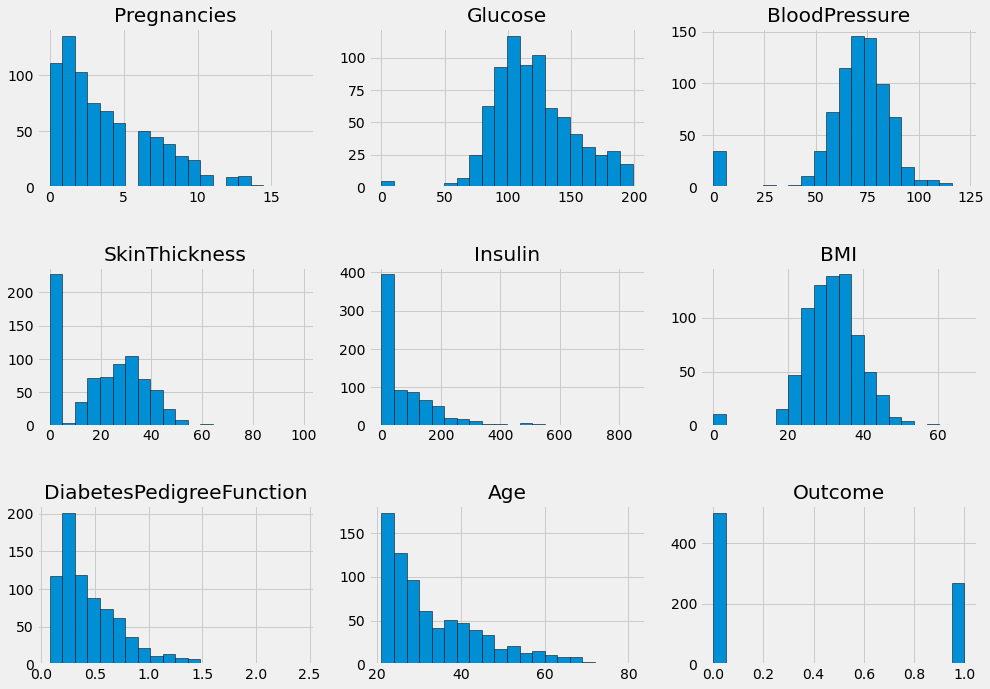

In [64]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Opdracht 4:
Wat valt er op?




Er valt op dat er een aantal features normaal verdeeld is, zoals BloodPressure en BMI. Wel zie je dat er ook een aantal afwijkingen zijn. Ook valt op dat het aantal pregnancies geen 5 is in de grafiek, maar wel in de tabel. 

Ook zijn er heel wat data die niet klopt, zoals bloodpressure met waarde 0.



### Opdracht  5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 

Bevatten sommige kolommen ongeldige waarden?

Repareer de tabel zo dat er geen nul waarden instaan? 

Welke waarde zou je kiezen als vervanging van de nul waarden?


TIP: Maak eerst een tabel met alleen de diabetes gevallen en gebruik de onderstaande cellen. 

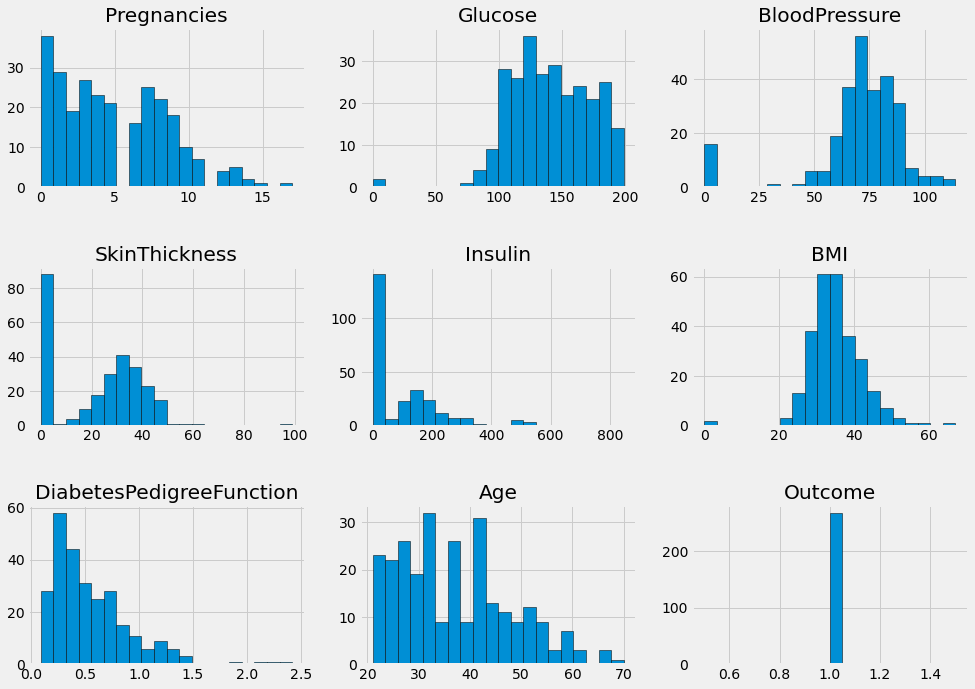

In [65]:
# Er zijn een aantal verschillen te zien. Zo heeft leeftijd een andere grafiek gekregen. 
# Ook heeft glucosegehalte een ander grafiek. Dit komt doordat de glucosegehalte bij diabetes patienten hoger is.
# Voor de rest lijken de grafieken wel op elkaar. Dus Glocose en leeftijd heeft de meeste invloed op diabetes

data = diab[diab['Outcome'] > 0]
columns=data.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


In [66]:
# De tabel bevat geen ongeldige waarden
data.isnull().values.any()

False

In [67]:
gem_glucose = data['Glucose'].mean()
gem_blood_pressure = data['BloodPressure'].mean()
gem_insuline =  data['Insulin'].mean()
gem_bmi = data['BMI'].mean()
gem_skin_thickness = data['SkinThickness'].mean()

# Change the columns where the colum equals zero
data['Glucose'] = np.where((data.Glucose == 0),gem_glucose, data.Glucose)
data['BloodPressure'] = np.where((data.BloodPressure == 0),gem_blood_pressure, data.BloodPressure)
data['Insulin'] = np.where((data.Insulin == 0),gem_insuline, data.Insulin)
data['BMI'] = np.where((data.BMI == 0),gem_bmi, data.BMI)
data['SkinThickness'] = np.where((data.SkinThickness == 0),gem_skin_thickness, data.SkinThickness)
    
data.eq(0).any() # Check wheter the columns contains zero as value

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Opdracht  6 

Hoe bepaal je in pandas de correlatie tussen twee of meerdere kolomen
Wat betekent het als er sprake is van een correlatie?



In [68]:
# Een correlatie tussen kolommen betekent dat ze afhankelijk zijn van elkaar. Als bijvoorbeeld col1 een correlatie 
# van 0.85 heeft met col2, betekent het dat als col1 2x zo groot of klein wordt, col2 1.85x zo groot of klein wordt.
# to do it for 2columns: col1.corr(coll2)

print(diab['Glucose'].corr(diab['Insulin'])) # correlatie tussen 2 tabellen

diab.corr() # all correlations



0.3313571099202094


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Opdracht 7:

Hoe maak je in SNS een heatmap, wat is een heatmap eigenlijk?
Maak een correlatie tabel in pandas en geef die weer in een heatmap

<AxesSubplot:>

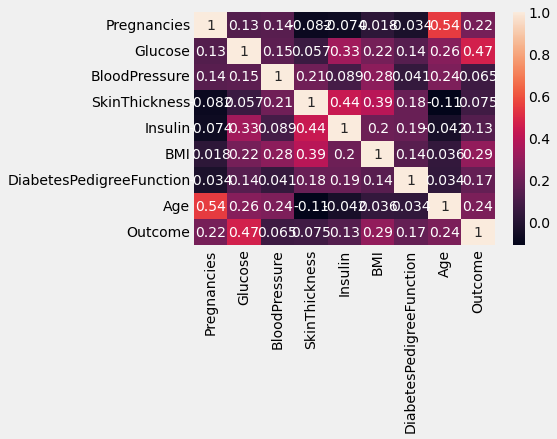

In [69]:
# Een heatmap is een datavisualisatietechniek die de omvang van 
# een fenomeen als kleur in twee dimensies laat zien. De kler laat duidelijk zien hoe de correlatie is.

import seaborn as sns

sns.heatmap(diab.corr(), annot=True)

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hier ondergenoemde classifier de mediawiki pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier kiezen?
.
.
.
.




In [70]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 8:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschrijving:

. Zet de kolom outcome in een apart variabele. Dit is de label
. De rest van de kolommen komen in een ander variabele. Dit zijn de features
. De train en test data worden van elkaar gesplit. 25% test en 75% train data. De verhouding is wel dezelfde qua outcome.

. De head laat de eerste vijf rijen zien.

In [71]:
# De code hieronder is absuluut noodzakelijk voor een ML training.

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [72]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72
706,10,115,0,0,0,0.0,0.261,30
606,1,181,78,42,293,40.0,1.258,22
118,4,97,60,23,0,28.2,0.443,22


In [73]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

### Opdracht 9:

Wat zie je in de output van de bovenstaande cellen? (2 stuks)


Antwoord: Bovenaan is er een tabel met de features en onder is er een tabel met de label (outcome)
    
    
   

### SVM (Zoek uit wat een SVM model is?) 

Support vector machine is een algoritme op het gebied van machine learning. Met SVM kun je voorspellingen doen door data in groepen te verdelen. Het valt binnen Supervised Learning. Je kunt SVM gebruiken om zowel numerieke waarden te voorspellen (regressie) als om een groep of label te bepalen (classificatie).

In [74]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


### Logistic Regression (Wat is een Logistic Regression model?)

Logistic Regression is een model waarmee je voorspellingen kan maken om de kans op een positieve uitkomst van een categorische afhankelijke variabele te voorspellen. Hierbij voorspel je dus bijvoorbeeld de kans op titanic survived ja of nee.

In [75]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


### Opdracht  10:
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.

In [76]:
model=DecisionTreeClassifier()
  
model.fit(train_X,train_Y)
prediction=model.predict(test_X)

metrics.accuracy_score(prediction, test_Y) # getal rond de 0.75 - 0.80

0.78125

### Alle systemen op een rijtje.


In [77]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.760417


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

In [78]:
### Wat is Ensemble?

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning 
# algorithm in order to improve generalizability / robustness over a single estimator.



### Opdracht 11

Om de nauwkeurigheid van een model te bepalen wordt ook wel gebruik 
gemaakt van een confusion matrix, maak voor een van de get bruikte modelen een confusion 
matrix en doe een uitspraak over de betrouwbaarheid van het model?



In [79]:
#  Confusion matrix.
from sklearn.metrics import confusion_matrix

confusion_matrix(prediction, test_Y)




array([[104,  25],
       [ 21,  42]], dtype=int64)

## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [80]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?

De getallen betekenen hoe de correlatie is met de outcome kolom. Hogere getal is een grotere correlatie.

Verschil:   ....

Overeenkomst: ......



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
Glucose, BMI en leeftijd. Dit kun je terugzien in de heatmap. Ook kon je dit verwachten sinds we onderzoek aan het begin hebben gedaan.


### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet


In [81]:
Antwoord: geef minimaal twee argumenten.
    
    
    

SyntaxError: invalid syntax (364900216.py, line 1)